In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import math
import pandas as pd

In [2]:
def read_file(file_name, speic_name):
    hist = []
    hist_temp = []
    hist_conv = []
    hist_count = []
    with open(file_name, 'r') as file:
        for line in file.readlines():
            if line[0:4] == 'Time':
                if hist_count != [] and hist_conv != []:
                    hist_temp.append(hist_count) 
                    hist_temp.append(hist_conv) 
                    hist.append(hist_temp)
                hist_count = []
                hist_conv = []
                hist_temp = []
                hist_temp.append(float(line.strip('Time (s): ')))
            else:
                string = '	' + str(speic_name) + ': '
                line = line.strip('. \n').split(string)
                if len(line) != 2:
                    print('Wrong species name!')
                    return 0
                else: 
                    hist_count.append(int(line[0]))
                    hist_conv.append(int(line[1]))
            hist_temp.append(hist_count) 
            hist_temp.append(hist_conv) 
            hist.append(hist_temp)
        return hist

In [3]:
def time_valid(file_name, t_i, t_f, speic_name):
    hist = read_file(file_name, speic_name)
    min_time = hist[0][0]
    max_time = hist[-1][0]
    if t_i == -1 and t_f == -1:
        return min_time, max_time 
    elif min_time <= t_i <= max_time and t_i <= t_f <= max_time:
        return t_i, t_f
    else:
        print('Wrong input time period!')
        return -1.0, -1.0

Start time(s):  0.0
End time(s):  0.2


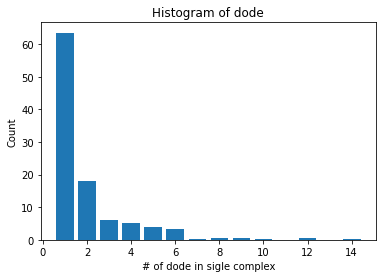

In [4]:
def hist(file_name, t_i, t_f, speic_name):
    t_i, t_f = time_valid(file_name, t_i, t_f, speic_name)
    if t_i != -1 and t_f != -1:
        hist = read_file(file_name, speic_name)
        plot_count = []
        plot_conv = []
        tot = 0
        for i in hist:
            if t_i <= i[0] <= t_f:
                tot += 1
                for j in i[2]:
                    if j not in plot_conv:
                        plot_conv.append(j)
                        plot_count.append(i[1][i[2].index(j)])
                    else:
                        index = plot_conv.index(j)
                        plot_count[index] += i[1][i[2].index(j)]
        plot_count_mean = []                
        for i in plot_count:
            plot_count_mean.append(i/tot)
        print('Start time(s): ', t_i)
        print('End time(s): ', t_f)
        plt.bar(plot_conv, plot_count_mean)
        plt.title('Histogram of ' + str(speic_name))
        plt.xlabel('# of ' + speic_name + ' in sigle complex')
        plt.ylabel('Count')
        plt.show()
        return 0
    else:
        return 0
    
if __name__ == '__main__':
    hist('histogram_complexes_time_dode.dat', 0.0, 0.2, 'dode')

Start time(s):  0.0
End time(s):  1.0


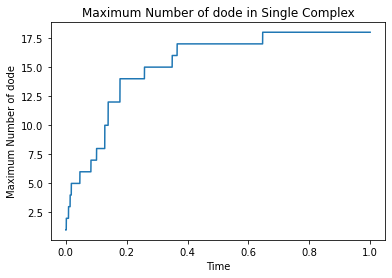

In [5]:
def max_complex(file_name, t_i, t_f, speic_name):
    t_i, t_f = time_valid(file_name, t_i, t_f, speic_name)
    if t_i != -1 and t_f != -1:
        hist = read_file(file_name, speic_name)
        plot_time = []
        plot_conv = []
        for i in hist:
            if t_i <= i[0] <= t_f:
                plot_time.append(i[0])
                plot_conv.append(max(i[2]))
        print('Start time(s): ', t_i)
        print('End time(s): ', t_f)
        plt.plot(plot_time, plot_conv)
        plt.title('Maximum Number of ' + str(speic_name) + ' in Single Complex')
        plt.xlabel('Time')
        plt.ylabel('Maximum Number of ' + str(speic_name))
        plt.show()
        return 0
    else:
        return 0
            
if __name__ == '__main__':
    max_complex('histogram_complexes_time_dode.dat', 0.0, 1.0, 'dode')

Start time(s):  0
End time(s):  1.0
Exclude Number:  0


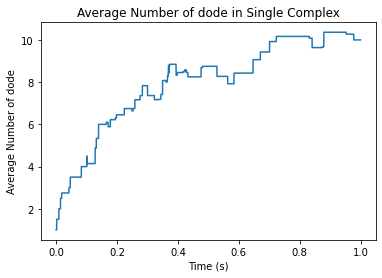

In [6]:
def mean_complex(file_name, t_i, t_f, speic_name, ExcludeNum = 0):
    t_i, t_f = time_valid(file_name, t_i, t_f, speic_name)
    if t_i != -1 and t_f != -1:
        hist = read_file(file_name, speic_name)
        plot_time = []
        plot_conv = []
        if ExcludeNum == 0:
            for i in hist:
                if t_i <= i[0] <= t_f:
                    plot_time.append(i[0])
                    plot_conv.append(np.mean(i[2]))
        elif ExcludeNum > 0:
            for i in hist:
                if t_i <= i[0] <= t_f:
                    count = 1
                    N = 0
                    temp_sum = 0
                    plot_time.append(i[0])
                    while count <= len(i[1]):
                        if i[2][count-1] >= ExcludeNum:
                            temp_sum += i[2][count-1]
                            N += 1
                        if count == len(i[1]):
                            if N != 0:
                                plot_conv.append(temp_sum/N)
                            else:
                                plot_conv.append(0)
                        count += 1
        else:
            print('ExcludeNum cannot smaller than 0!')
            return 0
        print('Start time(s): ', t_i)
        print('End time(s): ', t_f)
        print('Exclude Number: ', ExcludeNum)
        plt.plot(plot_time, plot_conv)
        plt.title('Average Number of ' + str(speic_name) + ' in Single Complex')
        plt.xlabel('Time (s)')
        plt.ylabel('Average Number of ' + str(speic_name))
        plt.show()
        return 0
    else:
        return 0
            
if __name__ == '__main__':
    mean_complex('histogram_complexes_time_dode.dat', 0, 1.0, 'dode', 0)

In [7]:
# import pandas as pd

# def hist_to_df_(file_name, speic_name_list = []):
#     df = pd.DataFrame(columns = ['Time(s)'])
#     index = -1
#     with open(file_name, 'r') as file:
#         for line in file.readlines():
#             pos = 0
#             if line[0:4] == 'Time':
#                 index += 1
#                 time = float(line.replace('Time (s): ', ''))
#                 df.loc[index, 'Time(s)'] = time
#             else:
#                 for i in line:
#                     if i in ['1','2','3','4','5','6','7','8','9','0']:
#                         pos += 1
#                     else:
#                         break
#                 num = int(line[0:pos])
#                 name = line[pos+1:-2]
#                 if speic_name_list != []:
#                     if name in speic_name_list:
#                         if name not in df.columns:
#                             df[name] = -1
#                         df.loc[index, name] = num
#                 else:
#                     if name not in df.columns:
#                         df[name] = -1
#                     df.loc[index, name] = num
#     df = df.replace({-1:0})
#     df = df.fillna(0) 
#     df.to_csv('hist_to_df.csv')
#     return df

# hist_to_df_(file_name = 'multi_comp_hist.dat', speic_name_list = ['B: 1. IL: 1.', 'B: 1.'])

In [8]:
import os

def hist_to_csv(FileName):
    name_list = ['Time (s)']
    with open(FileName, 'r') as file:
        for line in file.readlines():
            if line[0:9] != 'Time (s):':
                name = line.split('	')[1].strip(' \n')
                name_num = int(line.split('	')[1].split(' ')[1].strip('.'))
                if name_list != ['Time (s)']:
                    last_num = int(name_list[-1].split(' ')[1].strip('.'))
                else:
                    last_num = 0
                if name not in name_list:
                    if name_num-last_num == 1:
                        name_list.append(name)
                    else:
                        fill = range(last_num+1, name_num)
                        for i in fill:
                            name = str(line.split('	')[1].split(' ')[0]) + ' ' + str(i) + '.'
                            name_list.append(name)
    file.close()
    with open(FileName, 'r') as read_file, open('histogram.csv', 'w') as write_file:
        head = ''
        for i in name_list:
            head += i
            if i != name_list[-1]:
                head += ','
            else:
                head += '\n'
        write_file.write(head)
        stat = np.zeros(len(name_list))
        for line in read_file.readlines():
            if line[0:9] == 'Time (s):':
                if line != 'Time (s): 0\n':
                    write_line = ''
                    for i in range(len(stat)):
                        write_line += str(stat[i])
                        if i != len(stat)-1:
                            write_line += ','
                        else:
                            write_line += '\n'
                    write_file.write(write_line)
                stat = np.zeros(len(name_list))
                write_line = ''
                info = float(line.split(' ')[-1])
                stat[0] += info
            else:
                name = line.split('	')[-1].strip(' \n')
                num = float(line.split('	')[0])
                index = name_list.index(name)
                stat[index] += num
        
        for i in range(len(stat)):
            write_line += str(stat[i])
            if i != len(stat)-1:
                write_line += ','
            else:
                write_line += '\n'
        print(write_line)
        write_file.write(write_line)
        
    read_file.close()
    write_file.close()
    return 0

def hist_to_df(FileName, SaveCsv = True):
    hist_to_csv(FileName)
    df = pd.read_csv('histogram.csv')
    if not SaveCsv:
        os.remove('histogram.csv')
    return df


df = hist_to_df('histogram_complexes_time_icos_.dat', False)
df

1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0



,Time (s),icos: 1.,icos: 2.,icos: 3.,icos: 4.,icos: 5.,icos: 6.,icos: 7.,icos: 8.,icos: 9.,...,icos: 11.,icos: 12.,icos: 13.,icos: 14.,icos: 15.,icos: 16.,icos: 17.,icos: 18.,icos: 19.,icos: 20.
0,0.00000,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00001,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00002,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00003,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00004,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,0.99996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
99997,0.99997,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
99998,0.99998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
99999,0.99999,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0


In [9]:
def hist_temp(file_name, t_i, t_f, speic_name):
    t_i, t_f = time_valid(file_name, t_i, t_f, speic_name)
    if t_i != -1 and t_f != -1:
        hist = read_file(file_name, speic_name)
        plot_count = []
        plot_conv = []
        tot = 0
        for i in hist:
            if t_i <= i[0] <= t_f:
                tot += 1
                for j in i[2]:
                    if j not in plot_conv:
                        plot_conv.append(j)
                        plot_count.append(i[1][i[2].index(j)])
                    else:
                        index = plot_conv.index(j)
                        plot_count[index] += i[1][i[2].index(j)]
        plot_count_mean = []                
        for i in plot_count:
            plot_count_mean.append(i/tot)
        return plot_conv, plot_count_mean
    else:
        return 0

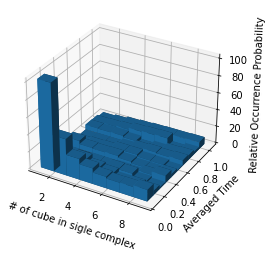

In [10]:
def hist_3d_time(file_name, t_i, t_f, speic_name, time_bins):
    t_i, t_f = time_valid(file_name, t_i, t_f, speic_name)
    t_arr = np.arange(t_i, t_f, (t_f-t_i)/time_bins)
    t_arr = np.append(t_arr, t_f)
    max_num = 0
    x_lst = []
    z_lst = []
    t_plt = np.zeros(time_bins)
    i = 0
    for i in range(0, len(t_arr)-1):
        t_plt[i] = (t_arr[i]+t_arr[i+1])/2
        x,z = hist_temp(file_name, t_arr[i], t_arr[i+1], speic_name)
        x_lst.append(x)
        z_lst.append(z)
        if max(x) > max_num:
            max_num = max(x)
    z_plt = np.zeros(shape = (max_num, time_bins))
    k = 0
    for i in x_lst:
        l = 0
        for j in i:
            z_plt[j-1, k] = z_lst[k][l]
            l += 1
        k += 1
    x_plt = np.arange(0, max_num, 1)+1
    
    xx, yy = np.meshgrid(x_plt, t_plt)
    X, Y = xx.ravel(), yy.ravel()
    Z = z_plt.ravel()
    bottom = np.zeros_like(Z)
    width = 1
    depth = 1/time_bins
    
    fig=plt.figure()
    ax=fig.gca(projection='3d')
    ax.bar3d(X, Y, bottom, width, depth, Z, shade=True)
    ax.set_xlabel('# of ' + speic_name + ' in sigle complex')
    ax.set_ylabel('Averaged Time')
    ax.set_zlabel('Relative Occurrence Probability')
    plt.show()

    
hist_3d_time('histogram_complexes_time_cube.dat', -1, -1, 'cube', 10)

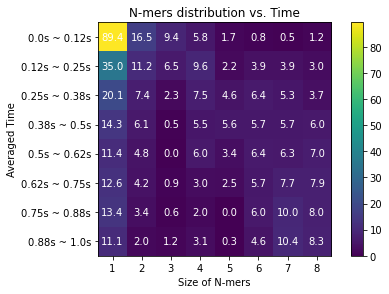

In [11]:
def hist_time_heatmap(file_name, t_i, t_f, speic_name, time_bins, show_num = True):
    t_arr = np.arange(t_i, t_f, (t_f-t_i)/time_bins)
    t_arr = np.append(t_arr, t_f)
    max_num = 0
    x_lst = []
    z_lst = []
    t_plt = []
    i = 0
    for i in range(0, len(t_arr)-1):
        t_plt.append(str(round(t_arr[i],2)) + 's ~ ' + str(round(t_arr[i+1],2)) + 's')
        x,z = hist_temp(file_name, t_arr[i], t_arr[i+1], speic_name)
        x_lst.append(x)
        z_lst.append(z)
        if max(x) > max_num:
            max_num = max(x)
    z_plt = np.zeros(shape = (max_num, time_bins))
    k = 0
    for i in x_lst:
        l = 0
        for j in i:
            z_plt[j-1, k] = z_lst[k][l]
            l += 1
        k += 1
    x_plt = np.arange(0, max_num, 1)+1
    z_plt_ = np.array(z_plt).T
    
    fig, ax = plt.subplots()
    im = ax.imshow(z_plt_)
    ax.set_xticks(np.arange(len(x_plt)))
    ax.set_yticks(np.arange(len(t_plt)))
    ax.set_xticklabels(x_plt)
    ax.set_yticklabels(t_plt)
    if show_num:
        for i in range(len(t_plt)):
            for j in range(len(x_plt)):
                text = ax.text(j, i, round(z_plt_[i, j],1),ha='center', va='center', color='w')
    ax.set_title('N-mers distribution vs. Time')
    fig.tight_layout()
    plt.colorbar(im)
    plt.xlabel('Size of N-mers')
    plt.ylabel('Averaged Time')
    plt.show()
    

hist_time_heatmap('histogram_complexes_time_cube.dat', 0, 1.0, 'cube', 8, True)

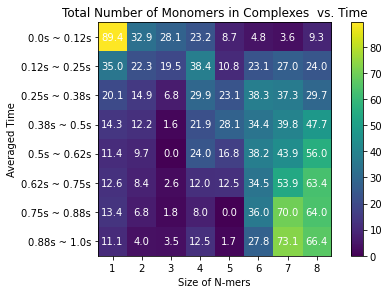

In [12]:
def hist_time_heatmap_mono_count(file_name, t_i, t_f, speic_name, time_bins, show_num = True):
    t_arr = np.arange(t_i, t_f, (t_f-t_i)/time_bins)
    t_arr = np.append(t_arr, t_f)
    max_num = 0
    x_lst = []
    z_lst = []
    t_plt = []
    i = 0
    for i in range(0, len(t_arr)-1):
        t_plt.append(str(round(t_arr[i],2)) + 's ~ ' + str(round(t_arr[i+1],2)) + 's')
        x,z = hist_temp(file_name, t_arr[i], t_arr[i+1], speic_name)
        x_lst.append(x)
        z_lst.append(z)
        if max(x) > max_num:
            max_num = max(x)
    z_plt = np.zeros(shape = (max_num, time_bins))
    k = 0
    for i in x_lst:
        l = 0
        for j in i:
            z_plt[j-1, k] = z_lst[k][l]
            l += 1
        k += 1
    x_plt = np.arange(0, max_num, 1)+1
    const = 1
    z_plt_mod = []
    for i in z_plt:
        z_plt_mod_temp = []
        for j in i:
            z_plt_mod_temp.append(j * const)
        const += 1
        z_plt_mod.append(z_plt_mod_temp)
    z_plt_ = np.array(z_plt_mod).T
    
    fig, ax = plt.subplots()
    im = ax.imshow(z_plt_)
    ax.set_xticks(np.arange(len(x_plt)))
    ax.set_yticks(np.arange(len(t_plt)))
    ax.set_xticklabels(x_plt)
    ax.set_yticklabels(t_plt)
    if show_num:
        for i in range(len(t_plt)):
            for j in range(len(x_plt)):
                text = ax.text(j, i, round(z_plt_[i, j],1),ha='center', va='center', color='w')
    ax.set_title('Total Number of Monomers in Complexes  vs. Time')
    fig.tight_layout()
    plt.colorbar(im)
    plt.xlabel('Size of N-mers')
    plt.ylabel('Averaged Time')
    plt.show()
    

hist_time_heatmap_mono_count('histogram_complexes_time_cube.dat', 0, 1.0, 'cube', 8, True)

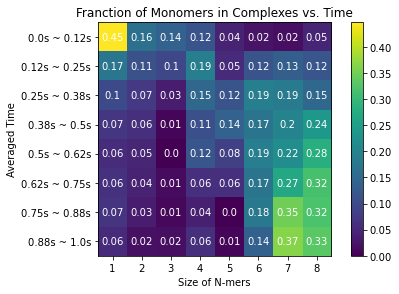

In [13]:
def hist_time_heatmap_fraction(file_name, t_i, t_f, speic_name, time_bins, show_num = True):
    t_arr = np.arange(t_i, t_f, (t_f-t_i)/time_bins)
    t_arr = np.append(t_arr, t_f)
    xx, zz = hist_temp(file_name, 0, 0, speic_name)
    n_tot = sum(zz)
    max_num = 0
    x_lst = []
    z_lst = []
    t_plt = []
    i = 0
    for i in range(0, len(t_arr)-1):
        t_plt.append(str(round(t_arr[i],2)) + 's ~ ' + str(round(t_arr[i+1],2)) + 's')
        x,z = hist_temp(file_name, t_arr[i], t_arr[i+1], speic_name)
        x_lst.append(x)
        z_lst.append(z)
        if max(x) > max_num:
            max_num = max(x)
    z_plt = np.zeros(shape = (max_num, time_bins))
    k = 0
    for i in x_lst:
        l = 0
        for j in i:
            z_plt[j-1, k] = z_lst[k][l]
            l += 1
        k += 1
    x_plt = np.arange(0, max_num, 1)+1
    const = 1
    z_plt_mod = []
    for i in z_plt:
        z_plt_mod_temp = []
        for j in i:
            z_plt_mod_temp.append(j * const / n_tot)
        const += 1
        z_plt_mod.append(z_plt_mod_temp)
    z_plt_ = np.array(z_plt_mod).T
    
    fig, ax = plt.subplots()
    im = ax.imshow(z_plt_)
    ax.set_xticks(np.arange(len(x_plt)))
    ax.set_yticks(np.arange(len(t_plt)))
    ax.set_xticklabels(x_plt)
    ax.set_yticklabels(t_plt)
    if show_num:
        for i in range(len(t_plt)):
            for j in range(len(x_plt)):
                text = ax.text(j, i, round(z_plt_[i, j],2),ha='center', va='center', color='w')
    ax.set_title('Franction of Monomers in Complexes vs. Time')
    fig.tight_layout()
    plt.colorbar(im)
    plt.xlabel('Size of N-mers')
    plt.ylabel('Averaged Time')
    plt.show()
    

hist_time_heatmap_fraction('histogram_complexes_time_cube.dat', 0, 1.0, 'cube', 8, True)

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
def read_transition_matrix(FileName:str, SpeciesName:str, InitialTime:float, FinalTime:float):
    ti_switch = False
    tf_switch = False
    spec_switch = False
    ti_matrix = []
    tf_matrix = []
    with open(FileName, 'r') as file:
        for line in file.readlines():
            if line[0:5] == 'time:':
                if float(line.split(' ')[1]) == InitialTime:
                    ti_switch = True
                if float(line.split(' ')[1]) == FinalTime:
                    tf_switch = True
                if float(line.split(' ')[1]) != InitialTime:
                    ti_switch = False
                if float(line.split(' ')[1]) != FinalTime:
                    tf_switch = False
            if line[0:8] == 'lifetime':
                ti_switch = False
                tf_switch = False
                spec_switch = False
            if line[0:4] == 'size':
                ti_switch = False
                tf_switch = False
                spec_switch = False
            if line[0:4] == SpeciesName:
                spec_switch = True
            if ti_switch and spec_switch:
                if line != SpeciesName + '\n':
                    info = line.strip(' ').strip('\n').split(' ')
                    temp_list = []
                    for i in info:
                        temp_list.append(int(i))
                    ti_matrix.append(temp_list)    
            if tf_switch and spec_switch:
                if line != SpeciesName + '\n':
                    info = line.strip(' ').strip('\n').split(' ')
                    temp_list = []
                    for i in info:
                        temp_list.append(int(i))
                    tf_matrix.append(temp_list)
    ti_matrix = np.array(ti_matrix)
    tf_matrix = np.array(tf_matrix)
    return ti_matrix, tf_matrix

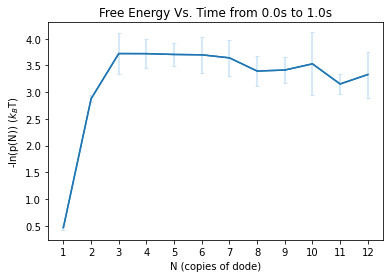

0

In [16]:
def free_energy(FileName:str, FileNum:int, InitialTime:float, FinalTime:float, SpeciesName:str, SaveFig:bool=False):
    matrix_list = []
    file_name_head = FileName.split('.')[0]
    file_name_tail = FileName.split('.')[1]
    for i in range(1, FileNum+1):
        temp_file_name = file_name_head + '_' + str(i) + '.' + file_name_tail
        if FileNum == 1:
            temp_file_name = 'transition_matrix_time.dat'
        ti_matrix, tf_matrix = read_transition_matrix(temp_file_name, SpeciesName, InitialTime, FinalTime)
        matrix = tf_matrix - ti_matrix
        matrix_list.append(matrix)
    sum_list_list = []
    for k in range(len(matrix_list)):
        sum_list = np.zeros(len(matrix))
        i = 0
        while i < len(matrix_list[k]):
            j = 0
            while j < len(matrix_list[k][i]):
                if i == j:
                    sum_list[i] += matrix_list[k][i][j]
                elif i > j:
                    if i % 2 == 0:
                        if j <= (i-1)/2:
                            sum_list[i] += matrix_list[k][i][j]
                    else:
                        if j <= i/2:
                            if (i-1)/2 == j:
                                sum_list[i] += matrix_list[k][i][j]/2
                            else:
                                sum_list[i] += matrix_list[k][i][j]
                else:
                    if j % 2 != 0:
                        if i <= j/2:
                            if (j-1)/2 == i:
                                sum_list[i] += matrix_list[k][i][j]/2
                            else:
                                sum_list[i] += matrix_list[k][i][j]
                        else:
                            sum_list[i] += matrix_list[k][i][j]
                    else:
                        sum_list[i] += matrix_list[k][i][j]
                j += 1
            i += 1
        sum_list_list.append(sum_list)
    energy_list_list = []
    for i in range(len(sum_list_list)):
        sum_arr = np.array(sum_list_list[i])
        sum_arr = sum_arr/sum_arr.sum()
        energy_list = np.asarray([])
        for i in sum_arr:
            if i > 0:
                energy_list = np.append(energy_list,-math.log(i))
            else:
                energy_list = np.append(energy_list,np.nan)
        energy_list_list.append(energy_list)
    n_list = list(range(1, 1 + len(matrix_list[0])))
    energy_list_list_rev = []
    for i in range(len(energy_list_list[0])):
        temp = []
        for j in range(len(energy_list_list)):
            temp.append(energy_list_list[j][i])
        energy_list_list_rev.append(temp)
    mean_energy_list = np.array([])
    std_energy_list = np.array([])
    for i in energy_list_list_rev:
        mean_energy_list = np.append(mean_energy_list, np.nanmean(i))
        if FileNum != 1:
            std_energy_list = np.append(std_energy_list, np.nanstd(i))
    errorbar_color = '#c9e3f6'
    plt.plot(n_list, mean_energy_list, 'C0')
    if FileNum != 1:
        plt.errorbar(n_list, mean_energy_list, yerr = std_energy_list, ecolor = errorbar_color, capsize = 2)
    plt.title('Free Energy Vs. Time from ' + str(float(InitialTime)) + 's to ' + str(float(FinalTime)) + 's')
    plt.xlabel('N (copies of ' + str(SpeciesName) + ')')
    plt.ylabel('-ln(p(N)) ($k_B$T)')
    plt.xticks(ticks = n_list)
    if SaveFig:
        plt.savefig('free_energy.png', dpi = 500)
    plt.show() 
    return 0

free_energy(FileName = 'transition_matrix_time.dat', FileNum = 5, InitialTime = 0.0, FinalTime = 1.0, SpeciesName = 'dode')

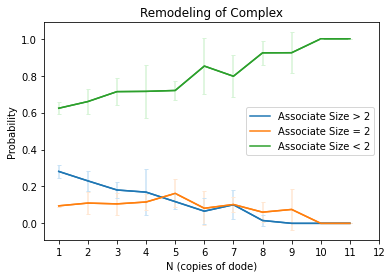

In [17]:
def associate_prob_symmetric(FileName:str, FileNum:int, InitialTime:float, FinalTime:float, SpeciesName:str, DivideSize:int=2, SaveFig:bool=False):
    matrix_list = []
    file_name_head = FileName.split('.')[0]
    file_name_tail = FileName.split('.')[1]
    for i in range(1, FileNum+1):
        temp_file_name = file_name_head + '_' + str(i) + '.' + file_name_tail
        if FileNum == 1:
            temp_file_name = 'transition_matrix_time.dat'
        ti_matrix, tf_matrix = read_transition_matrix(temp_file_name, SpeciesName, InitialTime, FinalTime)
        matrix = tf_matrix - ti_matrix
        matrix_list.append(matrix)
    above = []
    equal = []
    below = []
    for k in range(len(matrix_list)):
        above_temp = np.zeros(len(matrix_list[0][0]))
        equal_temp = np.zeros(len(matrix_list[0][0]))
        below_temp = np.zeros(len(matrix_list[0][0]))
        i = 0
        while i < len(matrix_list[k]):
            j = 0
            while j < len(matrix_list[k][i]):
                if i > j:
                    if i - j == DivideSize:
                        equal_temp[j] += matrix_list[k][i][j]
                    elif i - j > DivideSize:
                        above_temp[j] += matrix_list[k][i][j]
                    else:
                        below_temp[j] += matrix_list[k][i][j]
                j += 1
            i += 1
        above.append(above_temp)
        equal.append(equal_temp)
        below.append(below_temp)
    above_prob = []
    equal_prob = []
    below_prob = []
    for i in range(len(above)):
        above_prob_temp = np.array([])
        equal_prob_temp = np.array([])
        below_prob_temp = np.array([])
        for j in range(len(above[0])):
            sum = above[i][j] + equal[i][j] + below[i][j]
            if sum != 0:
                above_prob_temp = np.append(above_prob_temp, above[i][j]/sum)
                equal_prob_temp = np.append(equal_prob_temp, equal[i][j]/sum)
                below_prob_temp = np.append(below_prob_temp, below[i][j]/sum)
            else:
                above_prob_temp = np.append(above_prob_temp, np.nan)
                equal_prob_temp = np.append(equal_prob_temp, np.nan)
                below_prob_temp = np.append(below_prob_temp, np.nan)
        above_prob.append(above_prob_temp)
        equal_prob.append(equal_prob_temp)
        below_prob.append(below_prob_temp)
    above_prob_rev = []
    for i in range(len(above_prob[0])):
        temp = []
        for j in range(len(above_prob)):
            temp.append(above_prob[j][i])
        above_prob_rev.append(temp)
    equal_prob_rev = []
    for i in range(len(equal_prob[0])):
        temp = []
        for j in range(len(equal_prob)):
            temp.append(equal_prob[j][i])
        equal_prob_rev.append(temp)
    below_prob_rev = []
    for i in range(len(below_prob[0])):
        temp = []
        for j in range(len(below_prob)):
            temp.append(below_prob[j][i])
        below_prob_rev.append(temp)
    mean_above = []
    mean_equal = []
    mean_below = []
    std_above = []
    std_equal = []
    std_below = []
    for i in range(len(above_prob_rev)):
        mean_above.append(np.nanmean(above_prob_rev[i]))
        mean_equal.append(np.nanmean(equal_prob_rev[i]))
        mean_below.append(np.nanmean(below_prob_rev[i]))
        if FileNum != 1:
            std_above.append(np.nanstd(above_prob_rev[i]))
            std_equal.append(np.nanstd(equal_prob_rev[i]))
            std_below.append(np.nanstd(below_prob_rev[i]))
    n_list = list(range(1, 1 + len(matrix_list[0])))
    errorbar_color_1 = '#c9e3f6'
    errorbar_color_2 = '#ffe7d2'
    errorbar_color_3 = '#d7f4d7'
    plt.plot(n_list, mean_above, 'C0')
    plt.plot(n_list, mean_equal, 'C1')
    plt.plot(n_list, mean_below, 'C2')
    if FileNum != 1:
        plt.errorbar(n_list, mean_above, yerr = std_above, ecolor = errorbar_color_1, capsize = 2)
        plt.errorbar(n_list, mean_equal, yerr = std_equal, ecolor = errorbar_color_2, capsize = 2)
        plt.errorbar(n_list, mean_below, yerr = std_below, ecolor = errorbar_color_3, capsize = 2)
    plt.legend(['Associate Size > ' + str(DivideSize), 'Associate Size = ' + str(DivideSize), 'Associate Size < ' + str(DivideSize)])
    plt.xlabel('N (copies of ' + str(SpeciesName) + ')')
    plt.ylabel('Probability')
    plt.xticks(ticks = n_list)
    plt.title('Remodeling of Complex')
    if SaveFig:
        plt.savefig('associate_probability_symmetric.png', dpi = 500)
    plt.show()

associate_prob_symmetric(FileName = 'transition_matrix_time.dat', FileNum = 5, InitialTime = 0.0, FinalTime = 1.0, SpeciesName = 'dode', DivideSize = 2)    

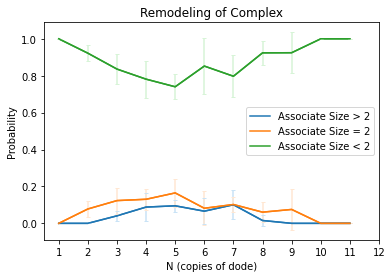

In [18]:
def associate_prob_asymmetric(FileName:str, FileNum:int, InitialTime:float, FinalTime:float, SpeciesName:str, DivideSize:int=2, SaveFig:bool=False):
    matrix_list = []
    file_name_head = FileName.split('.')[0]
    file_name_tail = FileName.split('.')[1]
    for i in range(1, FileNum+1):
        temp_file_name = file_name_head + '_' + str(i) + '.' + file_name_tail
        if FileNum == 1:
            temp_file_name = 'transition_matrix_time.dat'
        ti_matrix, tf_matrix = read_transition_matrix(temp_file_name, SpeciesName, InitialTime, FinalTime)
        matrix = tf_matrix - ti_matrix
        matrix_list.append(matrix)
    above = []
    equal = []
    below = []
    for k in range(len(matrix_list)):
        above_temp = np.zeros(len(matrix_list[0][0]))
        equal_temp = np.zeros(len(matrix_list[0][0]))
        below_temp = np.zeros(len(matrix_list[0][0]))
        i = 0
        while i < len(matrix_list[k]):
            j = 0
            while j < len(matrix_list[k][i]):
                if i > j:
                    if i % 2 == 0:
                        if j >= (i-1)/2:
                            if i - j == DivideSize:
                                equal_temp[j] += matrix_list[k][i][j]
                            elif i - j > DivideSize:
                                above_temp[j] += matrix_list[k][i][j]
                            else:
                                below_temp[j] += matrix_list[k][i][j]
                    else:
                        if j >= int(i/2):
                            if (i-1)/2 == j:
                                if i - j == DivideSize:
                                    equal_temp[j] += matrix_list[k][i][j]/2
                                elif i - j > DivideSize:
                                    above_temp[j] += matrix_list[k][i][j]/2
                                else:
                                    below_temp[j] += matrix_list[k][i][j]/2
                            else:
                                if i - j == DivideSize:
                                    equal_temp[j] += matrix_list[k][i][j]
                                elif i - j > DivideSize:
                                    above_temp[j] += matrix_list[k][i][j]
                                else:
                                    below_temp[j] += matrix_list[k][i][j]

                
                j += 1
            i += 1
        above.append(above_temp)
        equal.append(equal_temp)
        below.append(below_temp)
    above_prob = []
    equal_prob = []
    below_prob = []
    for i in range(len(above)):
        above_prob_temp = np.array([])
        equal_prob_temp = np.array([])
        below_prob_temp = np.array([])
        for j in range(len(above[0])):
            sum = above[i][j] + equal[i][j] + below[i][j]
            if sum != 0:
                above_prob_temp = np.append(above_prob_temp, above[i][j]/sum)
                equal_prob_temp = np.append(equal_prob_temp, equal[i][j]/sum)
                below_prob_temp = np.append(below_prob_temp, below[i][j]/sum)
            else:
                above_prob_temp = np.append(above_prob_temp, np.nan)
                equal_prob_temp = np.append(equal_prob_temp, np.nan)
                below_prob_temp = np.append(below_prob_temp, np.nan)
        above_prob.append(above_prob_temp)
        equal_prob.append(equal_prob_temp)
        below_prob.append(below_prob_temp)
    above_prob_rev = []
    for i in range(len(above_prob[0])):
        temp = []
        for j in range(len(above_prob)):
            temp.append(above_prob[j][i])
        above_prob_rev.append(temp)
    equal_prob_rev = []
    for i in range(len(equal_prob[0])):
        temp = []
        for j in range(len(equal_prob)):
            temp.append(equal_prob[j][i])
        equal_prob_rev.append(temp)
    below_prob_rev = []
    for i in range(len(below_prob[0])):
        temp = []
        for j in range(len(below_prob)):
            temp.append(below_prob[j][i])
        below_prob_rev.append(temp)
    mean_above = []
    mean_equal = []
    mean_below = []
    std_above = []
    std_equal = []
    std_below = []
    for i in range(len(above_prob_rev)):
        mean_above.append(np.nanmean(above_prob_rev[i]))
        mean_equal.append(np.nanmean(equal_prob_rev[i]))
        mean_below.append(np.nanmean(below_prob_rev[i]))
        if FileNum != 1:
            std_above.append(np.nanstd(above_prob_rev[i]))
            std_equal.append(np.nanstd(equal_prob_rev[i]))
            std_below.append(np.nanstd(below_prob_rev[i]))
    n_list = list(range(1, 1 + len(matrix_list[0])))
    errorbar_color_1 = '#c9e3f6'
    errorbar_color_2 = '#ffe7d2'
    errorbar_color_3 = '#d7f4d7'
    plt.plot(n_list, mean_above, 'C0')
    plt.plot(n_list, mean_equal, 'C1')
    plt.plot(n_list, mean_below, 'C2')
    if FileNum != 1:
        plt.errorbar(n_list, mean_above, yerr = std_above, ecolor = errorbar_color_1, capsize = 2)
        plt.errorbar(n_list, mean_equal, yerr = std_equal, ecolor = errorbar_color_2, capsize = 2)
        plt.errorbar(n_list, mean_below, yerr = std_below, ecolor = errorbar_color_3, capsize = 2)
    plt.legend(['Associate Size > ' + str(DivideSize), 'Associate Size = ' + str(DivideSize), 'Associate Size < ' + str(DivideSize)])
    plt.xlabel('N (copies of ' + str(SpeciesName) + ')')
    plt.ylabel('Probability')
    plt.xticks(ticks = n_list)
    plt.title('Remodeling of Complex')
    if SaveFig:
        plt.savefig('associate_probability_asymmetric.png', dpi = 500)
    plt.show()

associate_prob_asymmetric(FileName = 'transition_matrix_time.dat', FileNum = 5, InitialTime = 0.0, FinalTime = 1.0, SpeciesName = 'dode', DivideSize = 2)    

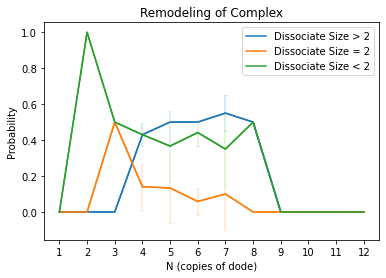

In [19]:
def dissociate_prob_symmetric(FileName:str, FileNum:int, InitialTime:float, FinalTime:float, SpeciesName:str, DivideSize:int=2, SaveFig:bool=False):
    matrix_list = []
    file_name_head = FileName.split('.')[0]
    file_name_tail = FileName.split('.')[1]
    for i in range(1, FileNum+1):
        temp_file_name = file_name_head + '_' + str(i) + '.' + file_name_tail
        if FileNum == 1:
            temp_file_name = 'transition_matrix_time.dat'
        ti_matrix, tf_matrix = read_transition_matrix(temp_file_name, SpeciesName, InitialTime, FinalTime)
        matrix = tf_matrix - ti_matrix
        matrix_list.append(matrix)
    above = []
    equal = []
    below = []
    for k in range(len(matrix_list)):
        above_temp = np.zeros(len(matrix_list[0][0]))
        equal_temp = np.zeros(len(matrix_list[0][0]))
        below_temp = np.zeros(len(matrix_list[0][0]))
        i = 0
        while i < len(matrix_list[k][0]):
            j = 0
            while j < len(matrix_list[k][i]):
                if i > j:
                    if j + 1 == DivideSize:
                        equal_temp[i] += matrix_list[k][j][i]
                    elif j + 1 > DivideSize:
                        above_temp[i] += matrix_list[k][j][i]
                    else:
                        below_temp[i] += matrix_list[k][j][i]
                j += 1
            i += 1
        above.append(above_temp)
        equal.append(equal_temp)
        below.append(below_temp)
    above_prob = []
    equal_prob = []
    below_prob = []
    for i in range(len(above)):
        above_prob_temp = np.array([])
        equal_prob_temp = np.array([])
        below_prob_temp = np.array([])
        for j in range(len(above[0])):
            sum = above[i][j] + equal[i][j] + below[i][j]
            if sum != 0:
                above_prob_temp = np.append(above_prob_temp, above[i][j]/sum)
                equal_prob_temp = np.append(equal_prob_temp, equal[i][j]/sum)
                below_prob_temp = np.append(below_prob_temp, below[i][j]/sum)
            else:
                above_prob_temp = np.append(above_prob_temp, np.nan)
                equal_prob_temp = np.append(equal_prob_temp, np.nan)
                below_prob_temp = np.append(below_prob_temp, np.nan)
        above_prob.append(above_prob_temp)
        equal_prob.append(equal_prob_temp)
        below_prob.append(below_prob_temp)
    above_prob_rev = []
    for i in range(len(above_prob[0])):
        temp = []
        for j in range(len(above_prob)):
            temp.append(above_prob[j][i])
        above_prob_rev.append(temp)
    equal_prob_rev = []
    for i in range(len(equal_prob[0])):
        temp = []
        for j in range(len(equal_prob)):
            temp.append(equal_prob[j][i])
        equal_prob_rev.append(temp)
    below_prob_rev = []
    for i in range(len(below_prob[0])):
        temp = []
        for j in range(len(below_prob)):
            temp.append(below_prob[j][i])
        below_prob_rev.append(temp)
    mean_above = []
    mean_equal = []
    mean_below = []
    std_above = []
    std_equal = []
    std_below = []
    for i in range(len(above_prob_rev)):
        mean_above.append(np.nanmean(above_prob_rev[i]))
        mean_equal.append(np.nanmean(equal_prob_rev[i]))
        mean_below.append(np.nanmean(below_prob_rev[i]))
        if FileNum != 1:
            std_above.append(np.nanstd(above_prob_rev[i]))
            std_equal.append(np.nanstd(equal_prob_rev[i]))
            std_below.append(np.nanstd(below_prob_rev[i]))
    mean_above = np.nan_to_num(mean_above)
    mean_equal = np.nan_to_num(mean_equal)
    mean_below = np.nan_to_num(mean_below)
    n_list = list(range(1, 1 + len(matrix_list[0])))
    errorbar_color_1 = '#c9e3f6'
    errorbar_color_2 = '#ffe7d2'
    errorbar_color_3 = '#d7f4d7'
    plt.plot(n_list, mean_above, 'C0')
    plt.plot(n_list, mean_equal, 'C1')
    plt.plot(n_list, mean_below, 'C2')
    if FileNum != 1:
        plt.errorbar(n_list, mean_above, yerr = std_above, ecolor = errorbar_color_1, capsize = 2)
        plt.errorbar(n_list, mean_equal, yerr = std_equal, ecolor = errorbar_color_2, capsize = 2)
        plt.errorbar(n_list, mean_below, yerr = std_below, ecolor = errorbar_color_3, capsize = 2)
    plt.legend(['Dissociate Size > ' + str(DivideSize), 'Dissociate Size = ' + str(DivideSize), 'Dissociate Size < ' + str(DivideSize)])
    plt.xlabel('N (copies of ' + str(SpeciesName) + ')')
    plt.ylabel('Probability')
    plt.xticks(ticks = n_list)
    plt.title('Remodeling of Complex')
    if SaveFig:
        plt.savefig('dissociate_probability_symmetric.png', dpi = 500)
    plt.show()

dissociate_prob_symmetric(FileName = 'transition_matrix_time.dat', FileNum = 5, InitialTime = 0.0, FinalTime = 1.0, SpeciesName = 'dode', DivideSize = 2)    

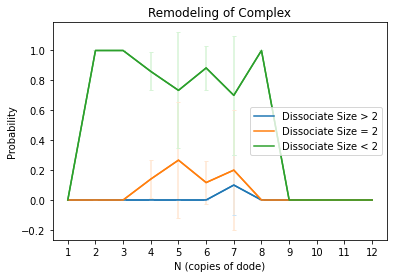

In [20]:
def dissociate_prob_asymmetric(FileName:str, FileNum:int, InitialTime:float, FinalTime:float, SpeciesName:str, DivideSize:int=2, SaveFig:bool=False):
    matrix_list = []
    file_name_head = FileName.split('.')[0]
    file_name_tail = FileName.split('.')[1]
    for i in range(1, FileNum+1):
        temp_file_name = file_name_head + '_' + str(i) + '.' + file_name_tail
        if FileNum == 1:
            temp_file_name = 'transition_matrix_time.dat'
        ti_matrix, tf_matrix = read_transition_matrix(temp_file_name, SpeciesName, InitialTime, FinalTime)
        matrix = tf_matrix - ti_matrix
        matrix_list.append(matrix)
    above = []
    equal = []
    below = []
    for k in range(len(matrix_list)):
        above_temp = np.zeros(len(matrix_list[0][0]))
        equal_temp = np.zeros(len(matrix_list[0][0]))
        below_temp = np.zeros(len(matrix_list[0][0]))
        i = 0
        while i < len(matrix_list[k][0]):
            j = 0
            while j < len(matrix_list[k][i]):
                if i > j:
                    if i % 2 == 0:
                        if j <= (i-1)/2:
                            if j + 1 == DivideSize:
                                equal_temp[i] += matrix_list[k][j][i]
                            elif j + 1 > DivideSize:
                                above_temp[i] += matrix_list[k][j][i]
                            else:
                                below_temp[i] += matrix_list[k][j][i]
                    else:
                        if j <= int(i/2):
                            if (i-1)/2 == j:
                                if j + 1 == DivideSize:
                                    equal_temp[i] += matrix_list[k][j][i]/2
                                elif j + 1 > DivideSize:
                                    above_temp[i] += matrix_list[k][j][i]/2
                                else:
                                    below_temp[i] += matrix_list[k][j][i]/2
                            else:
                                if j + 1 == DivideSize:
                                    equal_temp[i] += matrix_list[k][j][i]
                                elif j + 1 > DivideSize:
                                    above_temp[i] += matrix_list[k][j][i]
                                else:
                                    below_temp[i] += matrix_list[k][j][i]
                j += 1
            i += 1
#             print(above_temp)
#             print(equal_temp)
#             print(below_temp)
#             print('\n')
        above.append(above_temp)
        equal.append(equal_temp)
        below.append(below_temp)
    above_prob = []
    equal_prob = []
    below_prob = []
    for i in range(len(above)):
        above_prob_temp = np.array([])
        equal_prob_temp = np.array([])
        below_prob_temp = np.array([])
        for j in range(len(above[0])):
            sum = above[i][j] + equal[i][j] + below[i][j]
            if sum != 0:
                above_prob_temp = np.append(above_prob_temp, above[i][j]/sum)
                equal_prob_temp = np.append(equal_prob_temp, equal[i][j]/sum)
                below_prob_temp = np.append(below_prob_temp, below[i][j]/sum)
            else:
                above_prob_temp = np.append(above_prob_temp, np.nan)
                equal_prob_temp = np.append(equal_prob_temp, np.nan)
                below_prob_temp = np.append(below_prob_temp, np.nan)
        above_prob.append(above_prob_temp)
        equal_prob.append(equal_prob_temp)
        below_prob.append(below_prob_temp)
    above_prob_rev = []
    for i in range(len(above_prob[0])):
        temp = []
        for j in range(len(above_prob)):
            temp.append(above_prob[j][i])
        above_prob_rev.append(temp)
    equal_prob_rev = []
    for i in range(len(equal_prob[0])):
        temp = []
        for j in range(len(equal_prob)):
            temp.append(equal_prob[j][i])
        equal_prob_rev.append(temp)
    below_prob_rev = []
    for i in range(len(below_prob[0])):
        temp = []
        for j in range(len(below_prob)):
            temp.append(below_prob[j][i])
        below_prob_rev.append(temp)
    mean_above = []
    mean_equal = []
    mean_below = []
    std_above = []
    std_equal = []
    std_below = []
    for i in range(len(above_prob_rev)):
        mean_above.append(np.nanmean(above_prob_rev[i]))
        mean_equal.append(np.nanmean(equal_prob_rev[i]))
        mean_below.append(np.nanmean(below_prob_rev[i]))
        if FileNum != 1:
            std_above.append(np.nanstd(above_prob_rev[i]))
            std_equal.append(np.nanstd(equal_prob_rev[i]))
            std_below.append(np.nanstd(below_prob_rev[i]))
    mean_above = np.nan_to_num(mean_above)
    mean_equal = np.nan_to_num(mean_equal)
    mean_below = np.nan_to_num(mean_below)
    n_list = list(range(1, 1 + len(matrix_list[0])))
    errorbar_color_1 = '#c9e3f6'
    errorbar_color_2 = '#ffe7d2'
    errorbar_color_3 = '#d7f4d7'
    plt.plot(n_list, mean_above, 'C0')
    plt.plot(n_list, mean_equal, 'C1')
    plt.plot(n_list, mean_below, 'C2')
    if FileNum != 1:
        plt.errorbar(n_list, mean_above, yerr = std_above, ecolor = errorbar_color_1, capsize = 2)
        plt.errorbar(n_list, mean_equal, yerr = std_equal, ecolor = errorbar_color_2, capsize = 2)
        plt.errorbar(n_list, mean_below, yerr = std_below, ecolor = errorbar_color_3, capsize = 2)
    plt.legend(['Dissociate Size > ' + str(DivideSize), 'Dissociate Size = ' + str(DivideSize), 'Dissociate Size < ' + str(DivideSize)])
    plt.xlabel('N (copies of ' + str(SpeciesName) + ')')
    plt.ylabel('Probability')
    plt.xticks(ticks = n_list)
    plt.title('Remodeling of Complex')
    if SaveFig:
        plt.savefig('dissociate_probability_asymmetric.png', dpi = 500)
    plt.show()

dissociate_prob_asymmetric(FileName = 'transition_matrix_time.dat', FileNum = 5, InitialTime = 0.0, FinalTime = 1.0, SpeciesName = 'dode', DivideSize = 2)    

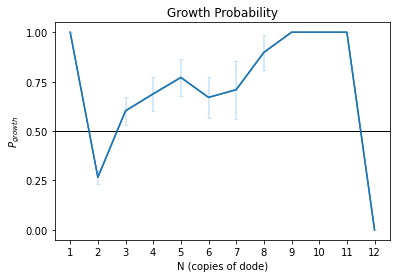

In [21]:
def growth_prob(FileName:str, FileNum:int, InitialTime:float, FinalTime:float, SpeciesName:str, SaveFig:bool=False):
    matrix_list = []
    file_name_head = FileName.split('.')[0]
    file_name_tail = FileName.split('.')[1]
    for i in range(1, FileNum+1):
        temp_file_name = file_name_head + '_' + str(i) + '.' + file_name_tail
        if FileNum == 1:
            temp_file_name = 'transition_matrix_time.dat'
        ti_matrix, tf_matrix = read_transition_matrix(temp_file_name, SpeciesName, InitialTime, FinalTime)
        matrix = tf_matrix - ti_matrix
        matrix_list.append(matrix)
    growth_list_list = []
    tot_list_list = []
    for k in range(len(matrix_list)):
        growth_list = []
        tot_list = []
        i = 0
        while i < len(matrix_list[k][0]):
            j = 0
            growth_sum = 0
            tot_sum = 0
            while j < len(matrix_list[k][i]):
                if i != j:
                    tot_sum += matrix_list[k][j][i]
                    if i < j:
                        growth_sum += matrix_list[k][j][i]
                j += 1
            growth_list.append(growth_sum)
            tot_list.append(tot_sum)
            i += 1
        growth_list_list.append(growth_list)
        tot_list_list.append(tot_list)
    growth_prob = []
    for i in range(len(growth_list_list)):
        growth_prob_temp = []
        for j in range(len(growth_list_list[i])):
            if tot_list_list[i][j] != 0:
                growth_prob_temp.append(growth_list_list[i][j]/tot_list_list[i][j])
            else:
                growth_prob_temp.append(0.0)
        growth_prob.append(growth_prob_temp)
    growth_prob_rev = []
    for i in range(len(growth_prob[0])):
        temp = []
        for j in range(len(growth_prob)):
            temp.append(growth_prob[j][i])
        growth_prob_rev.append(temp)
    mean = []
    std = []
    for i in growth_prob_rev:
        mean.append(np.nanmean(i))
        std.append(np.nanstd(i))
    n_list = list(range(1, 1 + len(matrix_list[0])))
    errorbar_color = '#c9e3f6'
    plt.plot(n_list, mean, color = 'C0')
    if FileNum != 1:
        plt.errorbar(n_list, mean, yerr = std, ecolor = errorbar_color, capsize = 2)
    plt.axhline(y = 1/2, c = 'black', lw = 1.0)
    plt.xlabel('N (copies of ' + str(SpeciesName) + ')')
    plt.ylabel('$P_{growth}$')
    plt.xticks(ticks = n_list)
    plt.yticks((0, 0.25, 0.5, 0.75, 1))
    plt.title('Growth Probability')
    if SaveFig:
        plt.savefig('growth_probability.png', dpi = 500)
    plt.show()
        
            
growth_prob(FileName = 'transition_matrix_time.dat', FileNum = 5, InitialTime = 0.0, FinalTime = 1.0, SpeciesName = 'dode')

In [25]:
def read_cluster_lifetime(FileName:str, SpeciesName:str, InitialTime:float, FinalTime:float):
    ti_switch = False
    tf_switch = False
    spec_switch = False
    lifetime_switch = False
    size_list = []
    ti_lifetime = []
    tf_lifetime = []
    with open(FileName, 'r') as file:
        for line in file.readlines():
            if line[0:6] == 'time: ':
                lifetime_switch = False
                spec_switch = False
                if float(line.split(' ')[1].strip('\n')) == InitialTime:
                    ti_switch = True
                if float(line.split(' ')[1].strip('\n')) == FinalTime:
                    tf_switch = True
                if float(line.split(' ')[1].strip('\n')) != InitialTime:
                    ti_switch = False
                if float(line.split(' ')[1].strip('\n')) != FinalTime:
                    tf_switch = False
            if line == 'lifetime for each mol type: \n':
                lifetime_switch = True
            if line == str(SpeciesName) + '\n':
                spec_switch = True

            if ti_switch and lifetime_switch and spec_switch:
                if line != str(SpeciesName) + '\n' and line != 'lifetime for each mol type: \n':
                    if line[0:20] == 'size of the cluster:':
                        size_list.append(int(line.split(':')[1].strip('\n')))
                    else:
                        str_list = line.strip('\n').strip(' ').split(' ')
                        temp = np.array([])
                        for i in str_list:
                            if i != '':
                                temp = np.append(temp, float(i))
                        ti_lifetime.append(temp)
            if tf_switch and lifetime_switch and spec_switch:
                if line != str(SpeciesName) + '\n' and line != 'lifetime for each mol type: \n':
                    if line[0:20] != 'size of the cluster:':
                        str_list = line.strip('\n').strip(' ').split(' ')
                        temp = np.array([])
                        for i in str_list:
                            if i != '':
                                temp = np.append(temp, float(i))
                        tf_lifetime.append(temp)
    return ti_lifetime, tf_lifetime, size_list

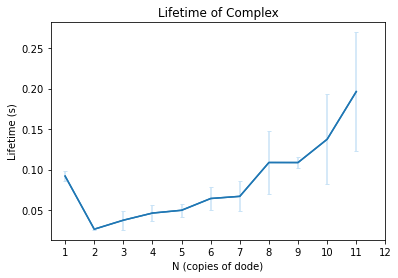

In [26]:
def complex_lifetime(FileName:str, FileNum:int, InitialTime:float, FinalTime:float, SpeciesName:str, SaveFig:bool=False):
    file_name_head = FileName.split('.')[0]
    file_name_tail = FileName.split('.')[1]
    mean_lifetime = []
    for i in range(1, FileNum+1):
        temp_file_name = file_name_head + '_' + str(i) + '.' + file_name_tail
        if FileNum == 1:
            temp_file_name = 'transition_matrix_time.dat'
        ti_lifetime, tf_lifetime, size_list = read_cluster_lifetime(temp_file_name, SpeciesName, InitialTime, FinalTime)
        mean_temp = []
        for i in range(len(tf_lifetime)):
            tf_lifetime[i] = np.delete(tf_lifetime[i], range(0, len(ti_lifetime[i])), axis = 0)
            mean_temp.append(tf_lifetime[i].mean())
        mean_lifetime.append(mean_temp) 
    mean_lifetime_rev = []
    for i in range(len(mean_lifetime[0])):
        temp = []
        for j in range(len(mean_lifetime)):
            temp.append(mean_lifetime[j][i])
        mean_lifetime_rev.append(temp)
    mean = []
    std = []
    for i in mean_lifetime_rev:
        mean.append(np.nanmean(i))
        if FileNum != 1:
            std.append(np.nanstd(i))
    errorbar_color = '#c9e3f6'
    plt.plot(size_list, mean, color = 'C0')
    if FileNum != 1:
        plt.errorbar(size_list, mean, yerr = std, ecolor = errorbar_color, capsize = 2)
    plt.xlabel('N (copies of ' + str(SpeciesName) + ')')
    plt.ylabel('Lifetime (s)')
    plt.xticks(ticks = size_list)
    plt.title('Lifetime of Complex')
    if SaveFig:
        plt.savefig('complex_lifetime.png', dpi = 500)
    plt.show()

complex_lifetime(FileName = 'transition_matrix_time.dat', FileNum = 5, InitialTime = 0.0, FinalTime = 1.0, SpeciesName = 'dode')